# Численные методы. Лабораторная работа №9. Косолапов И. ПМ-31

## Уравнение теплопроводности с граничными условиями Дирихле

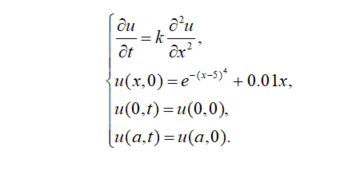

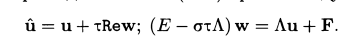/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import glob
import moviepy.editor as mpy

In [25]:
def mu(x):
    return np.exp(-(x-5)**4) + 0.01*x 

In [33]:
x

array([0.000e+00, 1.000e-02, 2.000e-02, ..., 1.999e+01, 2.000e+01,
       2.001e+01])

In [161]:
a, T, K, h, tau = 20, 10, 2, 0.01, 0.05
sigma = (1+1j)/2
x = np.array([i for i in np.arange(0,a,h)])
t = np.array([i for i in np.arange(0, T, tau)])
b0 = np.zeros(len(x)) - 2
b1 = np.zeros(len(x)-1) + 1
L = K/(h**2)*(np.diag(b0) + np.diag(b1, k = 1) + np.diag(b1, k = -1))
L[0] = 0
L[-1] = 0

In [162]:
U = np.zeros((len(t), len(x)))
U[0] = mu(x)
U[:, 0] = mu(np.zeros(len(t)))
l = np.zeros(len(t)) + mu(a)
U[:,-1] = l

In [163]:
L

array([[     0.,      0.,      0., ...,      0.,      0.,      0.],
       [ 20000., -40000.,  20000., ...,      0.,      0.,      0.],
       [     0.,  20000., -40000., ...,      0.,      0.,      0.],
       ...,
       [     0.,      0.,      0., ..., -40000.,  20000.,      0.],
       [     0.,      0.,      0., ...,  20000., -40000.,  20000.],
       [     0.,      0.,      0., ...,      0.,      0.,      0.]])

In [164]:
U[0] + tau*w.real

array([1.00015894e-01, 9.99853231e-05, 1.99970585e-04, ...,
       7.92983021e-03, 3.96769319e-03, 6.94577271e+00])

In [165]:
U[0]

array([3.68085585e-272, 1.00000000e-004, 2.00000000e-004, ...,
       1.99700000e-001, 1.99800000e-001, 2.00000000e-001])

In [166]:
U[1]

array([3.68085585e-272, 0.00000000e+000, 0.00000000e+000, ...,
       0.00000000e+000, 0.00000000e+000, 2.00000000e-001])

In [167]:
np.allclose(np.dot(left, w), right)

True

In [172]:
E = np.eye(len(x))
for k in tqdm(range(len(t-1))):
    left = E - sigma*tau*L
    right = L@U[k]
    w = np.linalg.solve(left, right)
    U[k+1] = U[k] + tau*w.real
    U[:,-1] = l

100%|█████████▉| 199/200 [01:23<00:00,  2.39it/s]


IndexError: index 200 is out of bounds for axis 0 with size 200

In [178]:
def gif_maker(x,t, U, name):
    plt.style.use('dark_background')
    for i in tqdm(range(0,len(t), 1)):
        fig, ax = plt.subplots(figsize= (12, 7))
        ax.set(xlim=(0, 20), ylim = (0,1))
        ax.plot(x, U[i], )
        ax.set_xlabel('x')
        ax.set_ylabel('U')
        ax.set_title(name)
        fig.savefig(f"./pic/{i}.png")
        plt.close()
    
    gif_name = f'{name}'
    fps = 24
    file_list = glob.glob('./pic/*')
    file_list.sort(key = lambda x: int(x.replace('./pic\\', '').replace('.png', '')))
    clip = mpy.ImageSequenceClip(file_list, fps=fps)
    clip.write_gif('{}.gif'.format(gif_name), fps=fps)

In [179]:
gif_maker(x,t, U, 'Dirichlet')

100%|██████████| 200/200 [00:15<00:00, 12.81it/s]


MoviePy - Building file Dirichlet.gif with imageio.


![ChessUrl](./Dirichlet.gif)

## Уравнение теплопроводности с граничными условиями Неймана

In [3]:
a, T, K, h, tau = 20, 10, 2, 0.01, 0.05
sigma = (1+1j)/2
x = np.array([i for i in np.arange(0,a+h,h)])
t = np.array([i for i in np.arange(0, T+tau, tau)])
b0 = np.zeros(len(x)) - 2
b1 = np.zeros(len(x)-1) + 1
L = K/(h**2)*(np.diag(b0) + np.diag(b1, k = 1) + np.diag(b1, k = -1))

In [4]:
U = np.zeros((len(t), len(x)))
U[0] = mu(x)

In [5]:
U[:, 0] = U[0,0]
U[:, -1] = U[0,-1]

In [8]:
L[0] = 0
L[0,0] = -2*K/h**2
L[0,1] = 2*K/h**2
L[-1] = 0
L[-1,-2] = 2*K/h**2
L[-1,-1] = -2*K/h**2

In [9]:
E = np.eye(len(x))
for k in tqdm(range(len(t)-1)):
    left = E - sigma*tau*L
    right = L@U[k]
    w = np.linalg.solve(left, right)
    U[k+1] = U[k] + tau*w.real

100%|██████████| 200/200 [00:59<00:00,  3.37it/s]


In [178]:
u0 = np.zeros(len(t))
uN = np.zeros(len(t))
u0[0] = U[0][0]
uN[0] = U[0][-1]
for k in range(len(t)-1):
    U[k+1][0] = 2*K*tau/(h**2)*(U[k][1]-U[k][0]) + U[k][0]
    #U[k+1][0] = 2*K*tau/(h**2)*(U[k][1] - U[k][0]) - U[k][0]
    U[k+1][-1] = -2*K*tau/(h**2)*(U[k][-1] - U[k][-2]) - U[k][-1]

In [18]:
gif_maker(x,t, U, 'Neumann')

100%|██████████| 201/201 [00:14<00:00, 14.26it/s]


MoviePy - Building file Neumann.gif.gif with imageio.


![ChessUrl](./Neumann.gif.gif)